In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [2]:

raw_dataset = pd.read_csv('NY data summary  backfiled.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
146,5/1/2017,189.956917,4.01,76565,19276.644,4.5,1799148.324,538.8951,28.40%,245422,2.60%,5466.221827,2.80,228.984
147,6/1/2017,190.052705,3.90,76565,19276.644,4.6,1799148.324,538.8951,28.40%,245422,2.60%,3850.093982,3.07,229.351
148,7/1/2017,190.840081,3.97,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,4010.836341,3.04,228.127
149,8/1/2017,191.882768,3.88,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,3118.553708,2.92,228.207
150,9/1/2017,192.949840,3.81,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,2928.686450,2.79,230.219
151,10/1/2017,194.414177,3.90,76565,19276.644,4.5,1799148.324,538.8951,27.70%,245359,2.40%,3500.473181,2.54,229.361
152,11/1/2017,195.324362,3.92,76565,19276.644,4.5,1799148.324,538.8951,27.70%,245359,2.40%,3968.326158,2.71,228.960
153,12/1/2017,195.944311,3.95,76565,19276.644,4.4,1799148.324,538.8951,27.70%,245359,2.40%,3379.406569,2.81,228.871
154,1/1/2018,196.665120,4.03,76565,19276.644,4.3,1799148.324,541.0310,28.10%,244424,2.20%,4598.873831,2.90,230.297
155,2/1/2018,197.782954,4.33,79844,19216.182,4.3,1861147.410,541.0310,28.10%,244424,2.20%,4467.467264,2.94,232.256


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,193.187111,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.9,32.9,0.9
1,4/1/2005,195.162335,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.9,32.9,0.8
2,5/1/2005,196.732454,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.4,32.9,0.8
3,6/1/2005,198.197612,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.6,32.9,0.8
4,7/1/2005,199.811814,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.2,32.7,0.9


In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI less shelter                         0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,193.187111,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.900,32.9,0.9
1,195.162335,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.900,32.9,0.8
2,196.732454,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.400,32.9,0.8
3,198.197612,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.600,32.9,0.8
4,199.811814,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.200,32.7,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,191.882768,3.88,76565,19276.644,4.6,1799148.324,538.8951,245631,3118.553708,2.92,228.207,28.0,2.5
150,192.949840,3.81,76565,19276.644,4.6,1799148.324,538.8951,245631,2928.686450,2.79,230.219,28.0,2.5
151,194.414177,3.90,76565,19276.644,4.5,1799148.324,538.8951,245359,3500.473181,2.54,229.361,27.7,2.4
152,195.324362,3.92,76565,19276.644,4.5,1799148.324,538.8951,245359,3968.326158,2.71,228.960,27.7,2.4


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286e+00,1.037777,3.350000e+00,3.912500e+00,4.430000e+00,5.850000e+00,6.760000e+00
Personal_Income,154.0,6.098057e+04,7788.469356,4.644500e+04,5.463200e+04,6.016000e+04,6.621200e+04,7.656500e+04
Resident_Population,154.0,1.912799e+04,173.707970,1.879811e+04,1.896850e+04,1.914969e+04,1.928093e+04,1.933478e+04
Unemployment_Rate,154.0,6.403896e+00,1.829778,4.200000e+00,4.800000e+00,5.750000e+00,8.500000e+00,9.300000e+00
GDP,154.0,1.416691e+06,204163.929642,1.096834e+06,1.225295e+06,1.401401e+06,1.576387e+06,1.799148e+06
Crime_Rate,154.0,6.006205e+02,35.908272,5.388951e+02,5.803423e+02,5.967001e+02,6.239068e+02,6.730543e+02
Median_Debt,154.0,2.439314e+05,8780.198333,2.147010e+05,2.444550e+05,2.456310e+05,2.489982e+05,2.531410e+05
New_Structures,154.0,3.455813e+03,2312.150506,1.017219e+03,1.895782e+03,3.284193e+03,4.370401e+03,1.751628e+04
Economic_Conditions_Index,154.0,2.360584e+00,1.351554,-3.190000e+00,2.355000e+00,2.750000e+00,3.040000e+00,4.050000e+00
CPI less shelter,154.0,2.153250e+02,12.967668,1.869000e+02,2.047545e+02,2.214430e+02,2.263057e+02,2.302770e+02


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.866294,-1.899021,-0.876552,-1.566670,2.017189,-3.329130,1.036374,0.021764,-2.191989,0.518267,-1.487192
1,1.051011,-1.353099,-1.740600,-0.876552,-1.292471,2.017189,-3.183917,0.538149,0.280726,-2.114874,0.518267,-1.529747
2,0.916107,-1.353099,-1.740600,-0.931203,-1.292471,2.017189,-3.183917,0.658488,0.214135,-2.076316,0.518267,-1.529747
3,0.781203,-1.353099,-1.740600,-0.876552,-1.292471,2.017189,-3.183917,0.469554,0.095753,-2.138008,0.518267,-1.529747
4,0.896835,-1.353099,-1.740600,-0.876552,-1.292471,2.017189,-2.867865,0.471376,0.103152,-2.014624,0.419549,-1.487192
5,1.012467,-1.353099,-1.740600,-0.821901,-1.292471,2.017189,-2.867865,0.946813,-0.089219,-1.852683,0.419549,-1.487192
6,0.964287,-1.353099,-1.740600,-0.767249,-1.292471,2.017189,-2.867865,0.641884,-0.318585,-1.528801,0.419549,-1.487192
7,1.253366,-1.353099,-1.740600,-0.767249,-1.292471,2.017189,-2.475277,0.354601,-0.274191,-1.605916,0.320832,-1.487192
8,1.503902,-1.353099,-1.740600,-0.767249,-1.292471,2.017189,-2.475277,0.432631,-0.067022,-1.713876,0.320832,-1.487192
9,1.446086,-1.353099,-1.740600,-0.821901,-1.292471,2.017189,-2.475277,0.492449,0.080955,-1.814126,0.320832,-1.487192


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[1.42293  ],
       [1.288174 ],
       [1.2249957],
       [1.1782901],
       [1.1906445],
       [1.2541593],
       [1.2337835],
       [1.2547073],
       [1.3529379],
       [1.3314526]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: ignored

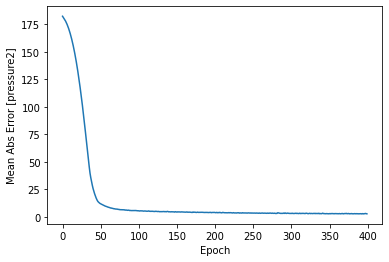

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 4.88
Accuracy: 97.54 %.


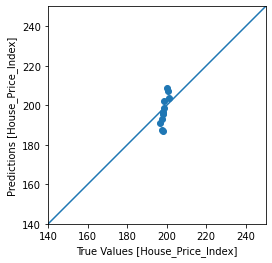

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.31
Accuracy: 98.21 %.


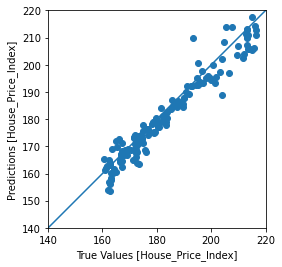

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,193.187111,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.900,32.9,0.9
1,195.162335,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.900,32.9,0.8
2,196.732454,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.400,32.9,0.8
3,198.197612,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.600,32.9,0.8
4,199.811814,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.200,32.7,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,198.477340,4.55,79844,19216.182,3.8,1861147.410,541.0310,245242,5090.556959,2.62,233.643,27.8,1.9
162,198.605966,4.63,79844,19216.182,3.8,1861147.410,541.0310,245242,4911.314579,2.92,234.836,27.8,1.9
163,200.036857,4.83,79844,19216.182,3.8,1861147.410,541.0310,244777,6074.946755,2.96,234.245,27.0,1.9
164,200.792924,4.87,79844,19216.182,3.8,1861147.410,541.0310,244777,6341.929028,2.92,233.082,27.0,1.9


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,0
0,3/1/2005,193.187111,5.93,46445,18798.114,4.8,1096833.984,673.0543,32.90%,214701,0.90%,5852.065587,2.39,186.900,209.894211
1,4/1/2005,195.162335,5.86,50442,18825.633,4.8,1152815.433,673.0543,32.90%,215976,0.80%,4700.094832,2.74,187.900,200.501984
2,5/1/2005,196.732454,5.72,50442,18825.633,4.7,1152815.433,673.0543,32.90%,215976,0.80%,4978.336136,2.65,188.400,197.843796
3,6/1/2005,198.197612,5.58,50442,18825.633,4.8,1152815.433,673.0543,32.90%,215976,0.80%,4541.492838,2.49,187.600,195.188919
4,7/1/2005,199.811814,5.70,50442,18825.633,4.8,1152815.433,673.0543,32.70%,218751,0.90%,4545.705558,2.50,189.200,194.537415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,198.477340,4.55,79844,19216.182,3.8,1861147.410,541.0310,27.80%,245242,1.90%,5090.556959,2.62,233.643,198.583679
162,9/1/2018,198.605966,4.63,79844,19216.182,3.8,1861147.410,541.0310,27.80%,245242,1.90%,4911.314579,2.92,234.836,202.010437
163,10/1/2018,200.036857,4.83,79844,19216.182,3.8,1861147.410,541.0310,27.00%,244777,1.90%,6074.946755,2.96,234.245,208.896332
164,11/1/2018,200.792924,4.87,79844,19216.182,3.8,1861147.410,541.0310,27.00%,244777,1.90%,6341.929028,2.92,233.082,206.990143


In [ ]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)